In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Load the movie dataset
df = pd.read_csv('Downloads/Movies.csv')

# Define a function to preprocess the tagline text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

# Apply the preprocessing function to the tagline column
df['tagline'] = df['tagline'].apply(preprocess_text)

# Create a TF-IDF vectorizer to convert the tagline text into numerical features
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df['tagline'])

# Apply k-means clustering to segment movies based on their characteristics
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(tfidf)

# Get the cluster labels for each movie
labels = kmeans.labels_

# Create a new dataframe with the cluster labels and original features
df_segmented = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

# Calculate the silhouette score to evaluate the clustering quality
silhouette = silhouette_score(tfidf, labels)
print(f'Silhouette score: {silhouette:.3f}')

# Visualize the clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tfidf.toarray())

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Movie Segmentation using K-Means Clustering')
plt.show()

NameError: name 'word_tokenize' is not defined

In [6]:
import pandas as pd

In [27]:
import numpy as np

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
from sklearn.cluster import KMeans

In [37]:
from sklearn.metrics import silhouette_score

In [49]:
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/gabierise/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabierise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Load the movie dataset
df = pd.read_csv('Downloads/Movies.csv')

In [51]:
# Define a function to preprocess the tagline text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

In [52]:
# Apply the preprocessing function to the tagline column
df['tagline'] = df['tagline'].apply(preprocess_text)

In [53]:
# Create a TF-IDF vectorizer to convert the tagline text into numerical features
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df['tagline'])

In [54]:
# Apply k-means clustering to segment movies based on their characteristics
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(tfidf)

KMeans(n_clusters=4, random_state=42)

In [55]:
# Get the cluster labels for each movie
labels = kmeans.labels_

In [56]:
# Create a new dataframe with the cluster labels and original features
df_segmented = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

In [57]:
# Calculate the silhouette score to evaluate the clustering quality
silhouette = silhouette_score(tfidf, labels)
print(f'Silhouette score: {silhouette:.3f}')

Silhouette score: 0.006


In [58]:
# Visualize the clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(tfidf.toarray())

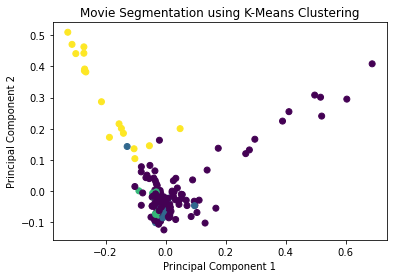

In [59]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Movie Segmentation using K-Means Clustering')
plt.show()